In [36]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt

# Generative Adversarial Network 

In [37]:
# Plotting function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1 - img.reshape((2, 2)), cmap='Greys_r')
    return fig, axes 

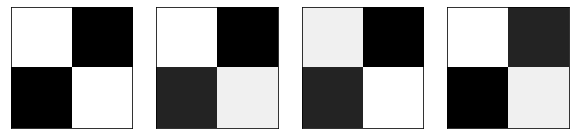

In [38]:
# Example of "faces"
faces = [np.array([0,1,1, 0]),
         np.array([0.1,0.9,0.8,0.2]),
         np.array([0.2,0.9,0.8,0.1]),
         np.array([0.1,0.8,0.9,0.2]),
         np.array([0.2,0.8,0.9,0.1])]

_ = view_samples(faces, 1, 4)

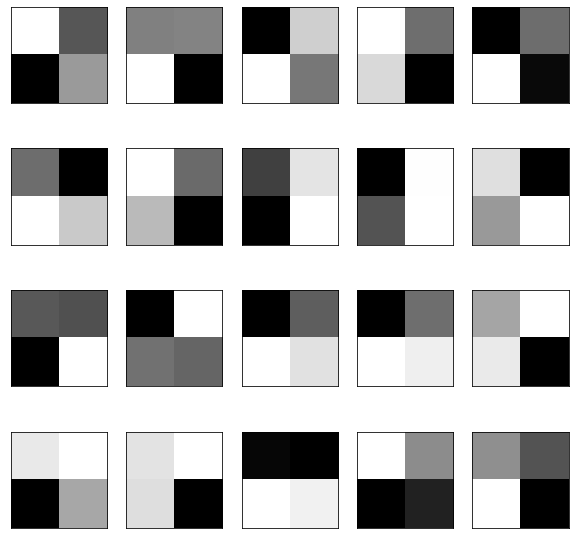

In [39]:
# Example of noise
noise = [np.random.randn(2, 2) for i in range(20)]

_ = view_samples(noise, 4, 5)

In [40]:
# Building the neural network
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

In [41]:
class Discriminator():
    def __init__(self):
        # Randomly initialize weights and bias between -1 and 1.
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    def error_from_image(self, image):
        prediction = self.forward(image)
        return -np.log(prediction)
    
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivates_weight = -image * (1 - prediction)
        derivates_bias = -(1 - prediction)
        return derivates_weight, derivates_bias
    
    def update_from_image(self, x, learning_rate):
        weights, bias = self.derivatives_from_image(x)
        self.weights -= learning_rate * weights
        self.bias -= learning_rate * bias
    
    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        return -np.log(1 - prediction)
    
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivatives_bias = prediction
        return derivatives_weights, derivatives_bias
    
    def update_from_noise(self, noise, learning_rate):
        weights, bias = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * weights
        self.bias -= learning_rate * bias

In [42]:
class Generator():
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.bias = np.array([np.random.normal() for i in range(4)])
    
    def forward(self, z):
        return sigmoid(z * self.weights + self.weights)

    def error(self, z, disciminator):
        x = self.forward(z)
        y = disciminator.forward(x)
        # We need the prediction to be as close to 0 as possible so the -log(1 - prediction) is returned.
        return -np.log(y)

    def derivatives(self, z, disciminator):
        x = self.forward(z)
        y = disciminator.forward(x)
        factor = -(1-y) * disciminator.weights * x * (1-x)
        derivatives_weights = factor * z
        derivatives_bias = factor
        return derivatives_weights, derivatives_bias

    def update(self, z, discriminator, learning_rate):
        derivatives_weights, derivatives_bias = self.derivatives(z, discriminator)
        self.weights -= learning_rate * derivatives_weights
        self.bias -= learning_rate * derivatives_bias

In [43]:
# Training
# Random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.02
epochs = 1000

discriminator = Discriminator()
generator = Generator()

# Arrays for the error plot
errors_discriminator = []
errors_generator = []

In [44]:
for epoch in range(epochs):
    for face in faces:
        # Update the disciminator weights for the real "face"
        discriminator.update_from_image(face, learning_rate)
        # Pick a random number to generate a fake "face"
        z = random.rand()
        # Calculate discriminator error
        errors_discriminator.append(sum(discriminator.error_from_image(face) + discriminator.error_from_noise(z)))
        # Calculate the generator error
        errors_generator.append(generator.error(z, discriminator))
        # Build fake face
        noise = generator.forward(z)
        # Update discriminator
        discriminator.update_from_noise(noise, learning_rate)
        # Update generator
        generator.update(z, discriminator, learning_rate)

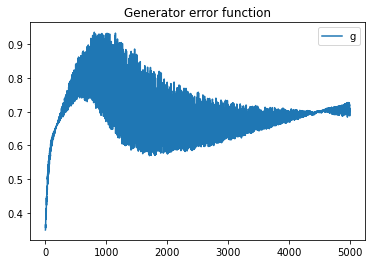

Text(0.5, 1.0, 'Discriminator error function')

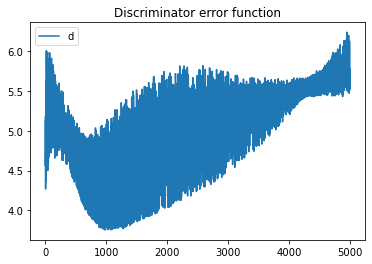

In [45]:
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminator error function")

[0.0456289  0.89814781 0.94138649 0.03797177]
[0.02603857 0.93040793 0.96467415 0.02083371]
[0.03734667 0.91103988 0.95106907 0.03064053]
[0.05742633 0.88113986 0.92791172 0.04859041]


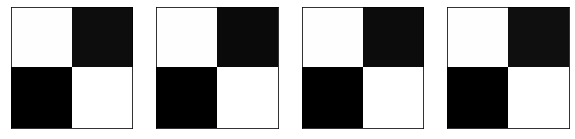

In [46]:
# Generating images

generated_images = []
for i in range(4):
    z = random.random()
    generated_image = generator.forward(z)
    generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)

for i in generated_images:
    print(i)